In [7]:
import detectron2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from utils.make_dataset import *
from utils.transforms import *
import cv2
from skimage import data, img_as_float, util
from skimage import exposure
import glob
import os
import re
import json
import numpy
from PIL import Image, ImageDraw
import torch

Populating the interactive namespace from numpy and matplotlib


In [8]:
annotation_path = 'segmentation/Bones_PD/annotations.json'

In [9]:
with open(annotation_path) as json_file:
    annotation_data = json.load(json_file)
print(len(list(annotation_data.keys())))

167


In [10]:
FilenamesList = glob.glob('segmentation/Bones_PD/images/*.jpg')

In [11]:
seg_dataset = []
for file in FilenamesList:
    png_name = file.split('/')[-1]
    if png_name in list(annotation_data.keys()):
        element = {}
        orig_image = Image.open(file)
        width, height = orig_image.size
        img = Image.new('L', (width, height), 0)

        instances = annotation_data[png_name]['instances']
        for instance in instances:
            polygon = instance['points']
            ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
        element['mask'] = numpy.array(img)
        element['path'] = file
        orig_image = np.stack((orig_image, orig_image, orig_image), axis=-1)
        element['image'] = orig_image
        seg_dataset.append(element)

throw_away = inverse + light + question_s

dec_seg_dataset = []

for i, item in enumerate(seg_dataset):
    
    if i not in throw_away:
        dec_seg_dataset.append(item)
        
seg_dataset = dec_seg_dataset

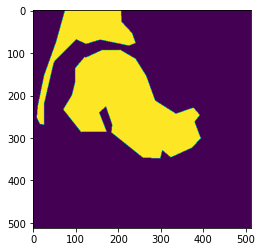

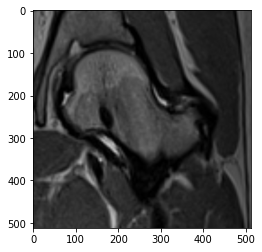

segmentation/Bones_PD/images/0719_PD.jpg


In [12]:
i = 1
plt.imshow(seg_dataset[i]['mask']) 
plt.show()
plt.imshow(seg_dataset[i]['image']) 
plt.show()
print(seg_dataset[i]['path'])


In [13]:
np.array(seg_dataset[i]['image']).shape

(512, 512, 3)

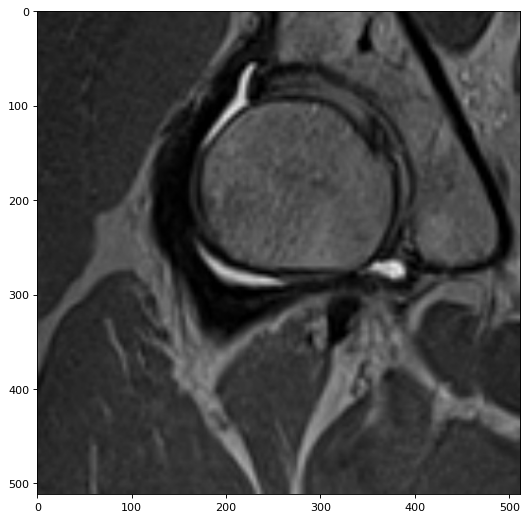

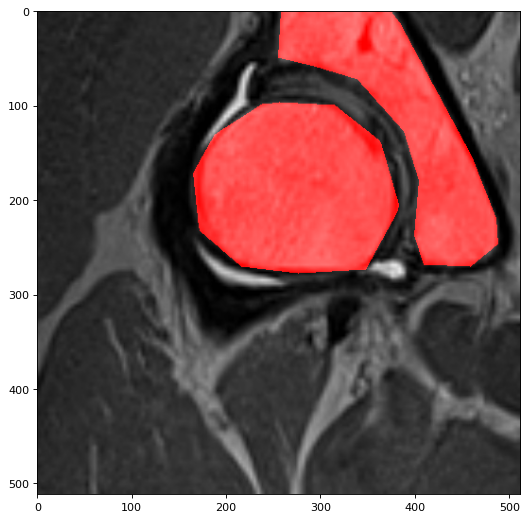

In [26]:
i = 2
img = np.array(seg_dataset[i]['image'])
figure(figsize=(8, 8), dpi=80)
imgplot = plt.imshow(img)
plt.show()
p2, p98 = np.percentile(img, (5, 100 - 5))
        

mask = array(seg_dataset[i]['mask'])
figure(figsize=(8, 8), dpi=80)
img[mask==1,0] = 255
imgplot = plt.imshow(img)
plt.show()

In [43]:

for i, item in enumerate(seg_dataset):        
    image = item['image']    
    mask = item['mask']    
    name = str(i)+'.png'
    mask_name = str(i)+'.gif'    

    outname_i =  os.path.join('segmentation', 'data_bones','images', name)
    outname_m =  os.path.join('segmentation', 'data_bones', 'masks', mask_name)
    #cv2.imwrite(outname_i, cv2.UMat(image))
    #cv2.imwrite(outname_m, cv2.UMat(mask))
    image = Image.fromarray(np.uint8(image))
    mask = Image.fromarray(np.uint8(mask*255))

    image.save(outname_i, "PNG")
    mask.save(outname_m, "GIF")


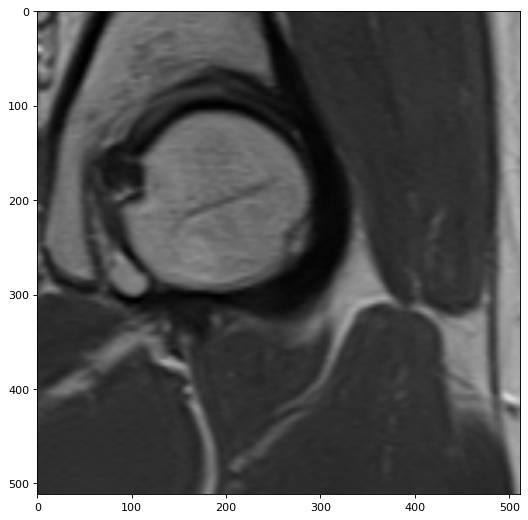

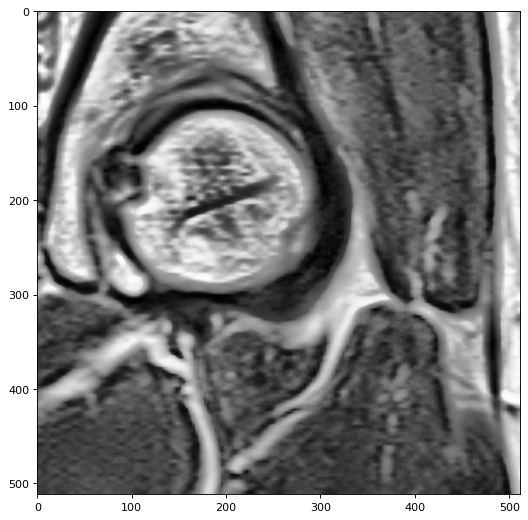

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


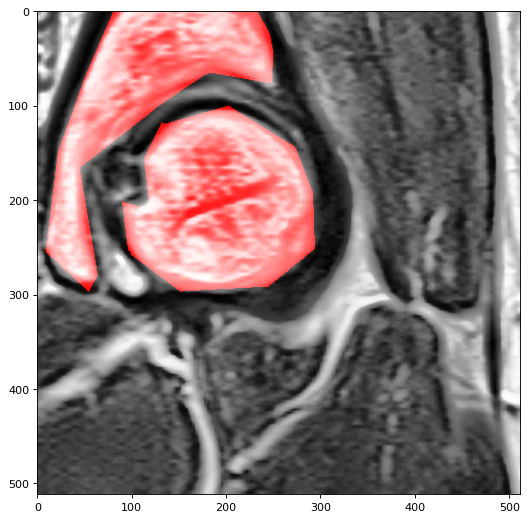

In [40]:
i = 47
img = seg_dataset[i]['image']
figure(figsize=(8, 8), dpi=80)
imgplot = plt.imshow(img)
plt.show()
p2, p98 = np.percentile(img, (5, 100 - 5))
        
img =  exposure.equalize_adapthist(img, clip_limit=0.03)
figure(figsize=(8, 8), dpi=80)
imgplot = plt.imshow(img)
plt.show()
mask = seg_dataset[i]['mask']
figure(figsize=(8, 8), dpi=80)
img[mask==1,0] = 255
imgplot = plt.imshow(img)
plt.show()

